# Enhanced Unicorn Startup Valuation Analysis Project

## Phase 1: Advanced Data Engineering & Feature Creation

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings 
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("unicorns till sep 2022.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


### Cleaning the data

In [26]:
def clean_valuation_data(df):
    df['valuation_cleaned'] = df['Valuation ($B)'].str.replace('$','').astype(float)
    df['Date_Joined'] = pd.to_datetime(df['Date Joined'])
    df['year'] = df['Date_Joined'].dt.year
    df['month'] = df['Date_Joined'].dt.month
    df['Quarter'] = df['Date_Joined'].dt.quarter
    df['Days_since_2007'] = (df['Date_Joined'] - datetime(2007, 1, 1)).dt.days

    # Assuming most startups are founded in the 2000s, we can create a new column for the age of the company when it became a unicorn
    df['Company_Age_At_Unicorn'] = df['year']-2000

    return df



In [27]:
df_cleaned = clean_valuation_data(df)
df_cleaned.head()


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,valuation_cleaned,Date_Joined,year,month,Quarter,Days_since_2007,Company_Age_At_Unicorn
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0,2017-04-07,2017,4,2,3749,17
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,2012-12-01,2012,12,4,2161,12
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0,2018-07-03,2018,7,3,4201,18
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0,2014-01-23,2014,1,1,2579,14
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,2018-01-08,2018,1,1,4025,18


### Advanced Feature Engineering

In [28]:
def create_advanced_features(df):
    country_avg__valuation = df.groupby('Country')['valuation_cleaned'].mean().to_dict()
    df['Country_Avg_Valuation'] = df['Country'].map(country_avg__valuation)
    df['Valuation_vs_Country_Avg'] = df['valuation_cleaned'] / df['Country_Avg_Valuation']
    df['Valuation_vs_Country_Avg'] = df['Valuation_vs_Country_Avg'].fillna(0)

    #Industry features
    industry_counts = df['Industry'].value_counts().to_dict()
    df['Industry_Competition'] = df['Industry'].map(industry_counts)

    industry_avg_val = df.groupby('Industry')['valuation_cleaned'].mean().to_dict()
    df['Industry_Avg_Valuation'] = df['Industry'].map(industry_avg_val)

    # Time-based features
    df['Market_Maturity'] = np.where(df['year'] <=2015, 'Early Stage',
                            np.where(df['year'] <= 2018, 'Growth Stage', 'Mature Stage'))
    
    #valuation categories
    df['Valuation_Category'] = pd.cut(df['valuation_cleaned'],
                                         bins = [0,2,5,10, float('inf')],
                                         labels = ['Low', 'Medium', 'High', 'Mega'])

    #analysis for investors
    df['Num_Investors'] = df[['Investors']].apply(
        lambda x: len(x['Investors'].split(',')) 
        if pd.notnull(x['Investors']) else 0, axis=1
    )

    return df

In [29]:
df_enhanced = create_advanced_features(df_cleaned)
df_enhanced.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,valuation_cleaned,Date_Joined,year,...,Quarter,Days_since_2007,Company_Age_At_Unicorn,Country_Avg_Valuation,Valuation_vs_Country_Avg,Industry_Competition,Industry_Avg_Valuation,Market_Maturity,Valuation_Category,Num_Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0,2017-04-07,2017,...,2,3749,17,3.899943,35.897965,74,4.256892,Growth Stage,Mega,4
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,2012-12-01,2012,...,4,2161,12,3.254544,39.022364,65,4.518769,Early Stage,Mega,3
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0,2018-07-03,2018,...,3,4201,18,3.899943,25.641403,103,3.759126,Growth Stage,Mega,3
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0,2014-01-23,2014,...,1,2579,14,3.254544,29.189957,239,3.579205,Early Stage,Mega,3
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,2018-01-08,2018,...,1,4025,18,6.800000,5.882353,224,2.950580,Growth Stage,Mega,3


## Phase 2: Advanced Exploratory Data Analysis

### Market Trend Analysis

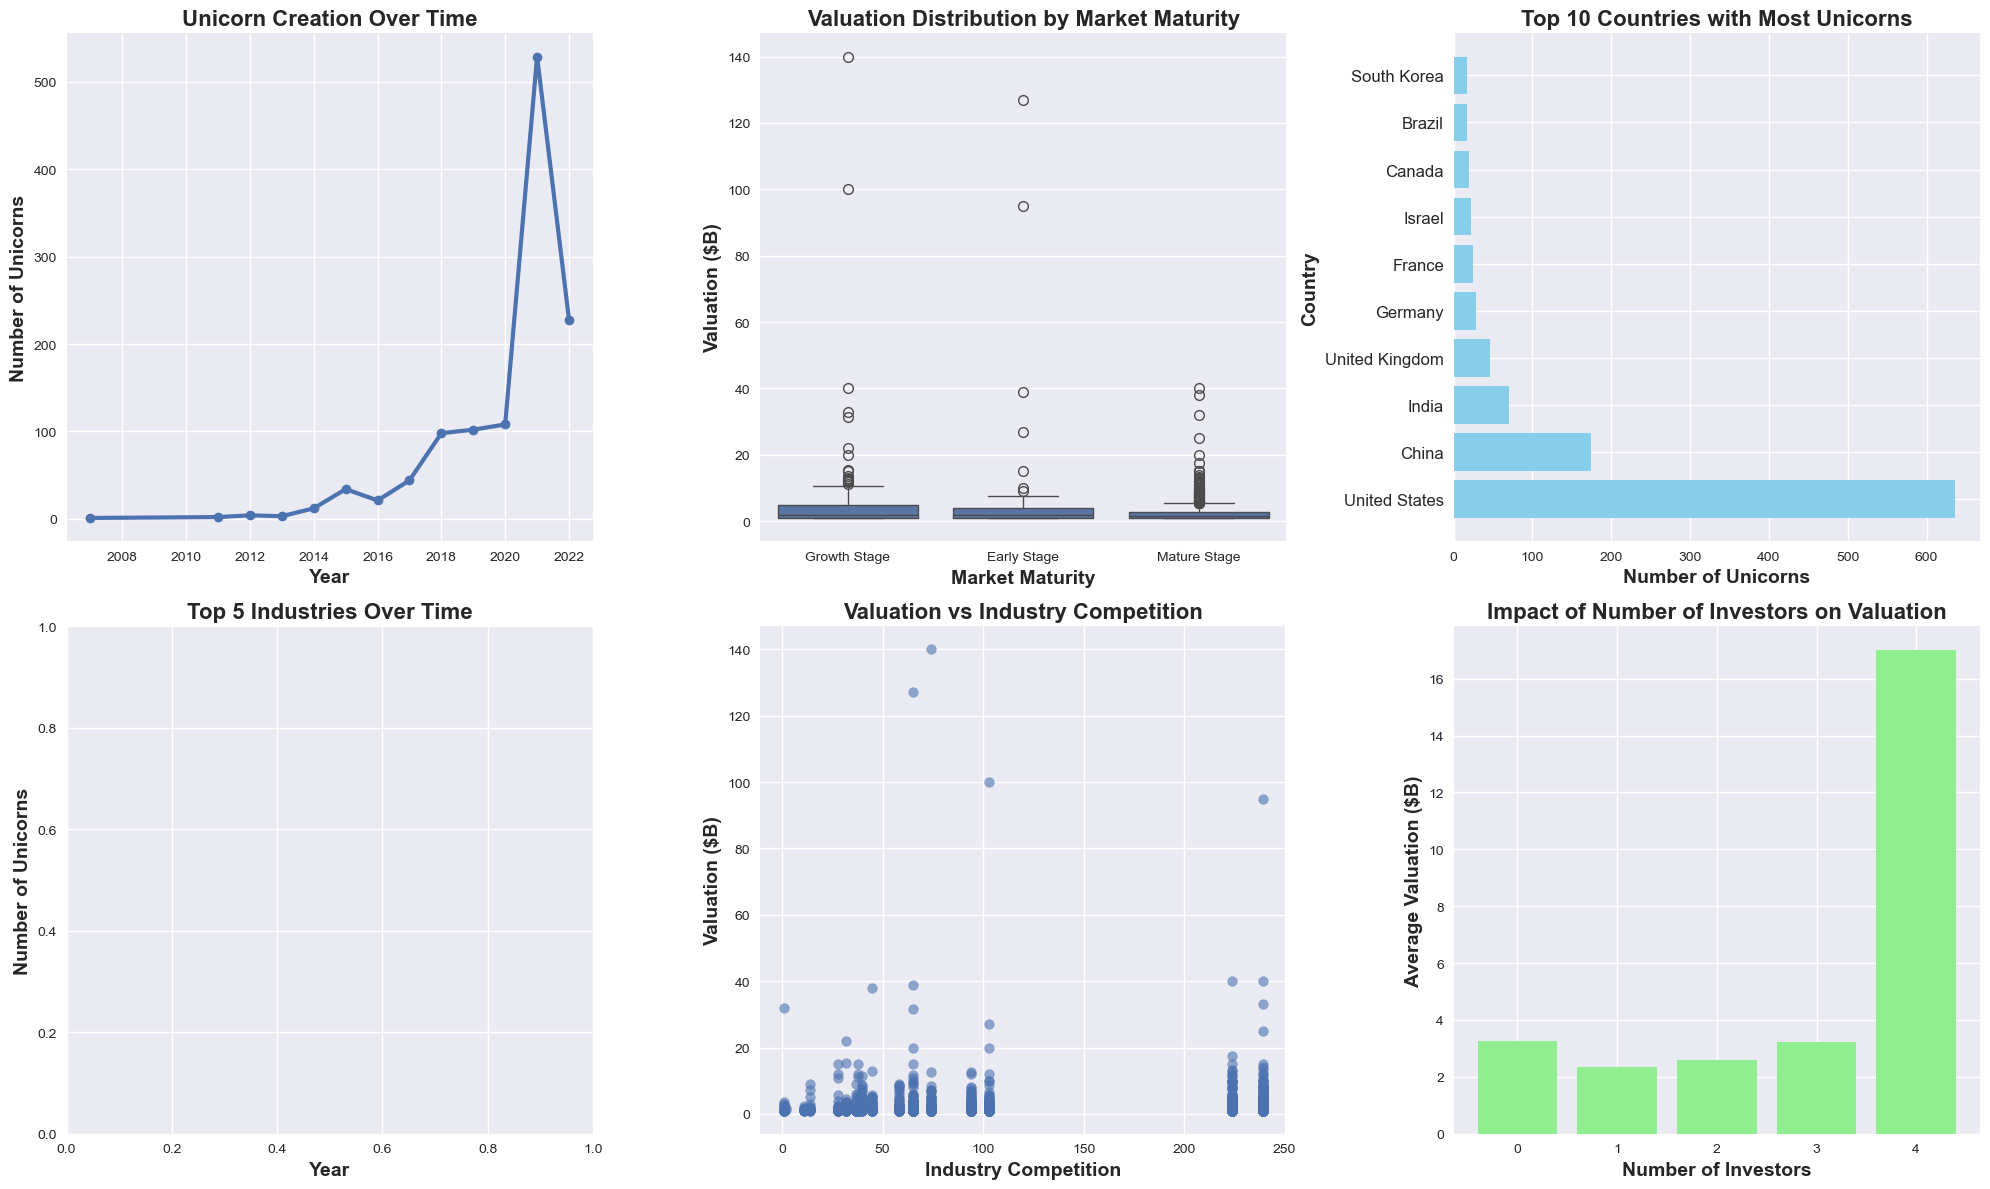

In [30]:
def advanced_eda(df):
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2,3,figsize=(20,12))

    # Unicorn creation over time
    yearly_counts = df.groupby('year').size()
    axes[0,0].plot(yearly_counts.index,yearly_counts.values, marker='o', linewidth = 3)
    axes[0,0].set_title('Unicorn Creation Over Time', fontsize=16,fontweight='bold')
    axes[0,0].set_xlabel('Year', fontsize=14,fontweight='bold')
    axes[0,0].set_ylabel('Number of Unicorns', fontsize=14,fontweight='bold')
    axes[0,0].grid(True)

    # Valuation distribution
    sns.boxplot(data=df,x='Market_Maturity', y='valuation_cleaned',ax=axes[0,1])
    axes[0,1].set_title('Valuation Distribution by Market Maturity', fontsize=16,fontweight='bold')
    axes[0,1].set_xlabel('Market Maturity', fontsize=14,fontweight='bold')
    axes[0,1].set_ylabel('Valuation ($B)', fontsize=14,fontweight='bold')

    # Country-wise valuation
    top_countries = df['Country'].value_counts().head(10)
    axes[0,2].barh(top_countries.index, top_countries.values, color='skyblue')
    axes[0,2].set_yticks(range(len(top_countries)))
    axes[0,2].set_yticklabels(top_countries.index, fontsize=12)
    axes[0,2].set_title('Top 10 Countries with Most Unicorns', fontsize=16,fontweight='bold')
    axes[0,2].set_xlabel('Number of Unicorns', fontsize=14,fontweight='bold')
    axes[0,2].set_ylabel('Country', fontsize=14,fontweight='bold')

    # Industry-wise valuation
    industry_year = df.groupby(['year','Industry']).size().unstack(fill_value=0)
    top_industries = df['Industry'].value_counts().head(5)
    for industry in top_industries:
        if industry in industry_year.columns:
            axes[1,0].plot(industry_year.index, industry_year[industry], label=industry, marker='o',linewidth=2)
    axes[1,0].set_title('Top 5 Industries Over Time', fontsize=16,fontweight='bold')
    axes[1,0].set_xlabel('Year', fontsize=14,fontweight='bold')
    axes[1,0].set_ylabel('Number of Unicorns', fontsize=14,fontweight='bold')
    #axes[1,0].legend()

    # Valuation vs Country Average
    axes[1,1].scatter(df['Industry_Competition'], df['valuation_cleaned'], alpha=0.6)
    axes[1,1].set_title('Valuation vs Industry Competition', fontsize=16,fontweight='bold')
    axes[1,1].set_xlabel('Industry Competition', fontsize=14,fontweight='bold')
    axes[1,1].set_ylabel('Valuation ($B)', fontsize=14,fontweight='bold')

    # Impact on valuation by number of investors
    investor_impact = df.groupby('Num_Investors')['valuation_cleaned'].mean()
    axes[1,2].bar(investor_impact.index, investor_impact.values, color='lightgreen')
    axes[1,2].set_title('Impact of Number of Investors on Valuation', fontsize=16,fontweight='bold')
    axes[1,2].set_xlabel('Number of Investors', fontsize=14,fontweight='bold')
    axes[1,2].set_ylabel('Average Valuation ($B)', fontsize=14,fontweight='bold')
    plt.tight_layout()
    plt.show()

advanced_eda(df_enhanced)

## Phase 3: Advanced Machine Learning Models

### Data Preparation

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb


In [32]:
def prep_ml_data(df):
    feature_columns = [
        'year', 'month', 'Quarter', 'Days_since_2007',
        'Country_Avg_Valuation', 'Industry_Competition',
        'Industry_Avg_Valuation', 'Num_Investors'
    ]

    categorical_features = ['Country', 'Industry', 'Market_Maturity']

    X_numeric = df[feature_columns].fillna(df[feature_columns].median())
    X_categorical = df[categorical_features].fillna('Unknown')
    x = pd.concat([X_numeric, X_categorical], axis=1)
    y = df['valuation_cleaned'].fillna(df['valuation_cleaned'].median())
    return x, y

x,y = prep_ml_data(df_enhanced)

In [33]:
# create pipelines for preprocessing and modeling
numeric_features = [
    'year', 'month', 'Quarter', 'Days_since_2007',
    'Country_Avg_Valuation', 'Industry_Competition',
    'Industry_Avg_Valuation', 'Num_Investors'
]
categorical_features = ['Country', 'Industry', 'Market_Maturity']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'), categorical_features)
    ])

### Advanced Model Implementation

In [34]:
def train_advanced_models(x,y):
    #split data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # define models
    models = {
        'Ridge': Pipeline([('preprocessor', preprocessor), 
                           ('regressor', Ridge())
                        ]),
        'Lasso': Pipeline([('preprocessor', preprocessor), 
                           ('regressor', Lasso())
                        ]),
        'ElasticNet': Pipeline([('preprocessor', preprocessor), 
                                ('regressor', ElasticNet())
                            ]),
        'RandomForest': Pipeline([('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor(random_state=42))
                                ]),
        'GradientBoosting': Pipeline([('preprocessor', preprocessor), 
                                      ('regressor', GradientBoostingRegressor(random_state=42))
                                    ]),
        'XGBoost': Pipeline([('preprocessor', preprocessor), 
                             ('regressor', xgb.XGBRegressor(random_state=42))
                            ])
    }

    results = {}
    
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        # metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'CV_MSE': -cv_scores.mean(),
            'CV_STD': cv_scores.std(),
            'Test_MSE': mse,
            'Test_MAE': mae,
            'Test_R2': r2,
            'Model': model
        }

    return results, X_test, y_test

model_results, X_test, y_test = train_advanced_models(x,y)

Model Performance Comparison:
                    CV_MSE  Test_MSE  Test_MAE  Test_R2
Ridge              69.4701   11.3797    2.4102  -0.2951
Lasso              68.0554    9.6650    2.0551  -0.0999
ElasticNet         67.3379    8.4876    2.0466   0.0341
RandomForest       88.3896   39.0860    2.7619  -3.4481
GradientBoosting   99.2977   87.4050    2.9007  -8.9470
XGBoost           138.3417  187.4475    3.4395 -20.3322


<Figure size 1200x600 with 0 Axes>

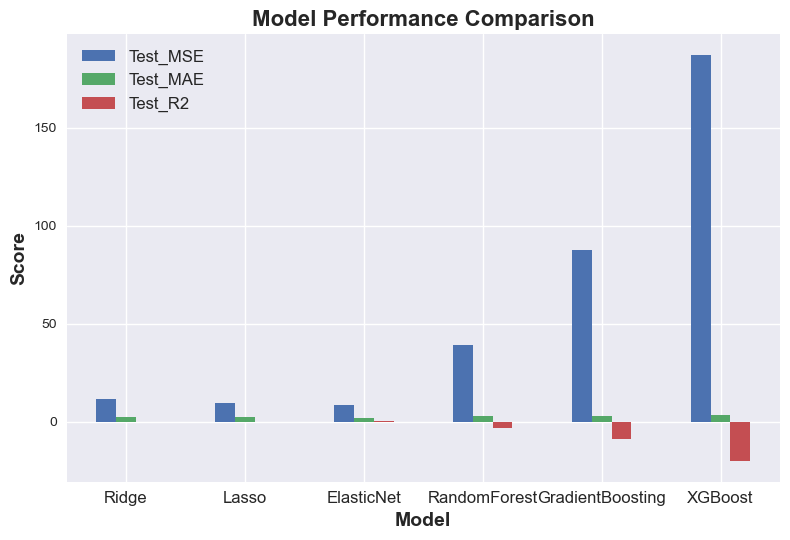

In [35]:
#Display results
results_df = pd.DataFrame({k: {metric: v[metric] 
                               for metric in ['CV_MSE', 'Test_MSE', 'Test_MAE', 'Test_R2']} 
                               for k, v in model_results.items()
                            }).T
print("Model Performance Comparison:")
print(results_df.round(4))
# Plotting the results
plt.figure(figsize=(12, 6))
results_df[['Test_MSE', 'Test_MAE', 'Test_R2']].plot(kind='bar', rot=0)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Phase 4: Model Interpretation & Business Insights

### Feature Importance Analysis

In [36]:
def analyze_feature_importance(model_results, X_test):
    #get lowest test mse model
    best_model_name = min(model_results, key=lambda x: model_results[x]['Test_MSE'])
    best_model = model_results[best_model_name]['Model']
    print(f"Analyzing feature importance for the best model: {best_model_name}")
    
    # feature imp for tree-based models
    if 'RandomForest' in best_model_name or 'GradientBoosting' in best_model_name or 'XGBoost' in best_model_name:
        feature_names = (numeric_features +
                         list(best_model.named_steps['preprocessor']
                              .named_transformers_['cat']
                              .get_feature_names_out(categorical_features)))
        importance = best_model.named_steps['regressor'].feature_importance_

        plt.figure(figsize=(12, 8))
        indices = np.argsort(importance)[::-1][:15]

        plt.barh(range(len(indices)), importance[indices], align='center')
        plt.title(f'Top 15 Feature Importance for {best_model_name}', fontsize=16, fontweight='bold')
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, fontsize=12)
        plt.xlabel('Importance', fontsize=14, fontweight='bold')
        plt.ylabel('Features', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    return best_model

best_model = analyze_feature_importance(model_results, X_test)


Analyzing feature importance for the best model: ElasticNet


In [37]:
# save the best model as a pkl file
import joblib
def save_model(model, filename='best_unicorn_model.pkl'):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

save_model(best_model)

Model saved as best_unicorn_model.pkl


### Business Intelligence Dashboard

In [38]:
def create_business_insights(df):
    insights = {}

    # Market Timing Analysis
    yearly_stats = df.groupby('year').agg({
        'valuation_cleaned': ['count','mean','sum'],
        'Industry': lambda x:x.mode().iloc[0] if len(x.mode())>0 else 'Mixed'
    }).round(2)
    
    insights['yearly_trends'] = yearly_stats

    # Country Analysis
    country_stats = df.groupby('Country').agg({
        'valuation_cleaned': ['count', 'mean', 'sum'],
        'Industry': lambda x: len(x.unique())
    }).sort_values(by=('valuation_cleaned', 'sum'), ascending=False).head(10)

    insights['geographic_leaders'] = country_stats

    # Industry Analysis
    industry_stats = df.groupby('Industry').agg({
        'valuation_cleaned': ['count','mean','median','std'],
        'Num_Investors': 'mean'
    }).sort_values(('valuation_cleaned','mean'), ascending=False)

    insights['industry_analysis'] = industry_stats

    # Investment Trends
    investor_analysis = df.groupby('Num_Investors').agg({
        'valuation_cleaned': ['count','mean'],
        'Country': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Mixed'
    })

    insights['investment_trends'] = investor_analysis

    return insights

business_insights = create_business_insights(df_enhanced)

In [39]:
# Displaying Business Insights
print("=== KEY BUSINESS INSIGHTS ===")
print("\n1. TOP PERFORMING INDUSTRIES BY AVERAGE VALUATION:")
print(business_insights['industry_analysis'][('valuation_cleaned', 'mean')].head(10))

print("\n2. GEOGRAPHIC DISTRIBUTION OF TOTAL UNICORN VALUE:")
print(business_insights['geographic_leaders'][('valuation_cleaned', 'sum')].head(5))

print("\n3. MARKET TRENDS OVER THE YEARS:")
print(business_insights['yearly_trends'][('valuation_cleaned', 'mean')].head(5))

print("\n4. INVESTMENT TRENDS BY NUMBER OF INVESTORS:")
print(business_insights['investment_trends'][('valuation_cleaned', 'mean')].head(5))

# Save the insights to a CSV file
insights_df = pd.concat([
    business_insights['yearly_trends'],
    business_insights['geographic_leaders'],
    business_insights['industry_analysis'],
    business_insights['investment_trends']
], axis=1)

=== KEY BUSINESS INSIGHTS ===

1. TOP PERFORMING INDUSTRIES BY AVERAGE VALUATION:
Industry
Sequoia Capital, Thoma Bravo, Softbank    32.000000
Other                                      4.518769
Artificial intelligence                    4.256892
E-commerce & direct-to-consumer            3.759126
Fintech                                    3.579205
Kuang-Chi                                  3.500000
Supply chain, logistics, & delivery        3.253385
Auto & transportation                      3.236750
Data management & analytics                3.150889
Edtech                                     3.064687
Name: (valuation_cleaned, mean), dtype: float64

2. GEOGRAPHIC DISTRIBUTION OF TOTAL UNICORN VALUE:
Country
United States     2069.89
China              678.59
United Kingdom     205.45
India              202.92
Germany             80.88
Name: (valuation_cleaned, sum), dtype: float64

3. MARKET TRENDS OVER THE YEARS:
year
2007     1.38
2011     6.20
2012    39.50
2013     3.33
2014    1

## Phase 5: Advanced Visualization & Reporting

### Interactive Dashboard Components

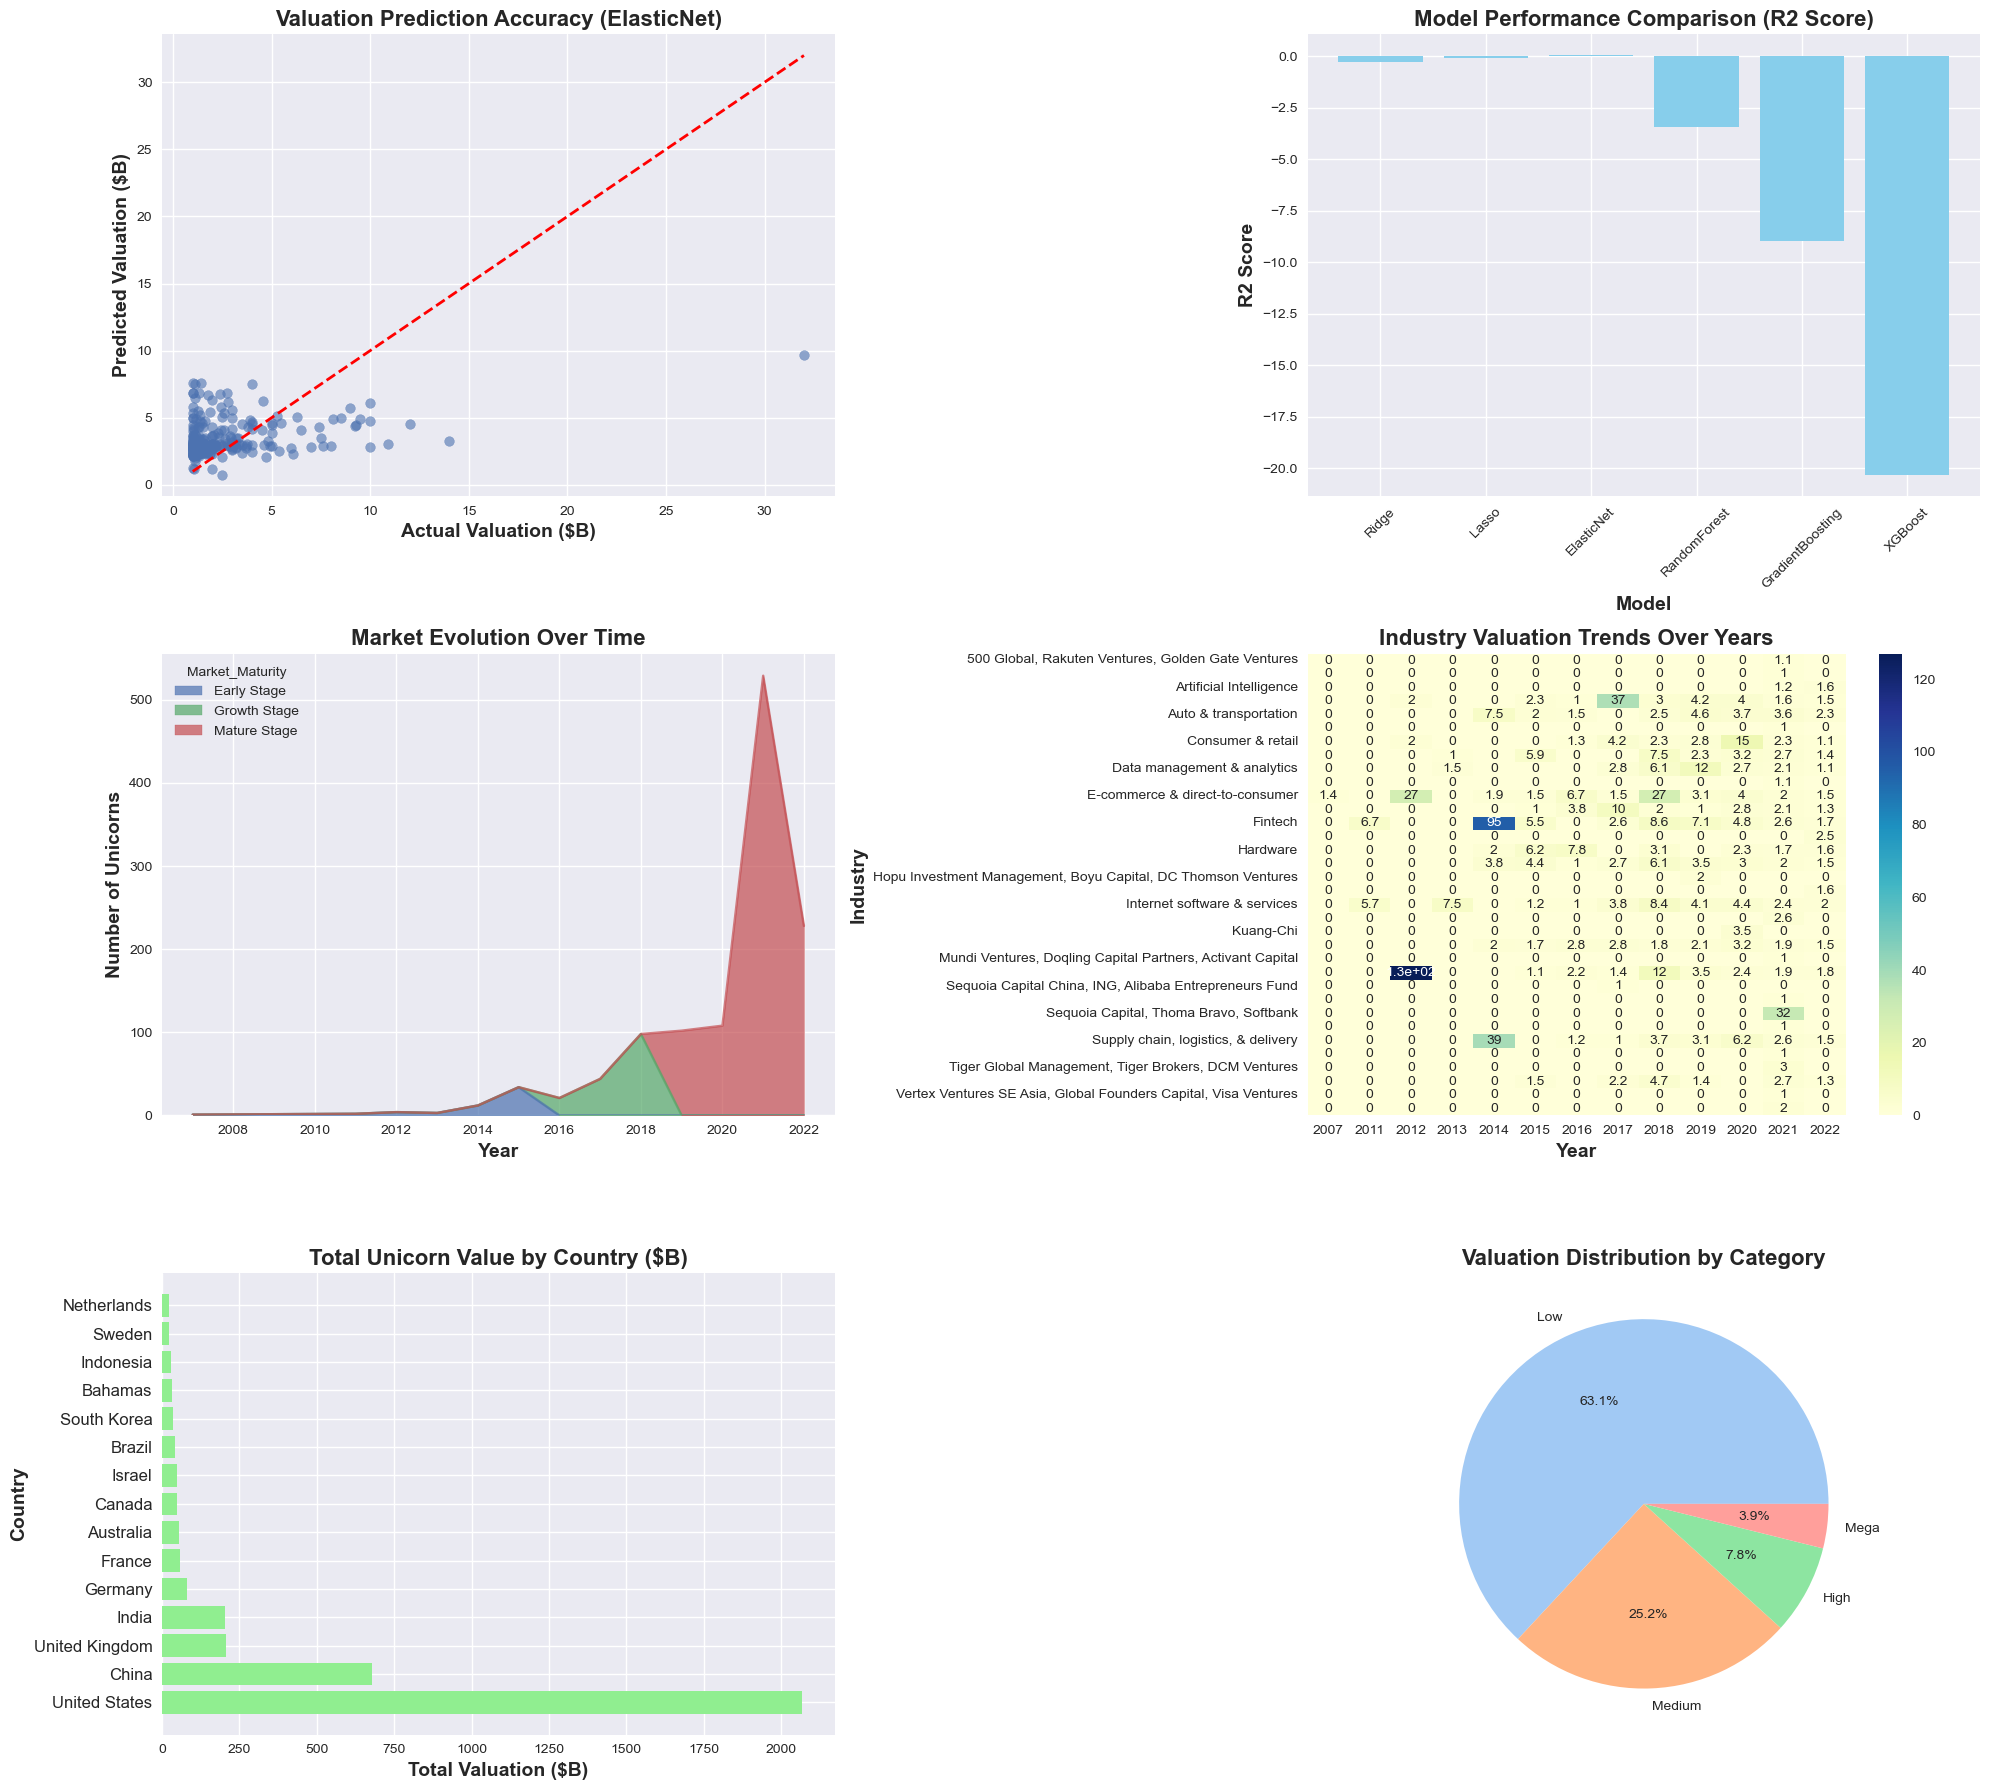

In [40]:
def create_executive_dashboard(df, model_results):
    fig, axes = plt.subplots(3,2, figsize=(20,18))

    # valuation prediction accuracy
    best_model_name = min(model_results, key=lambda x: model_results[x]['Test_MSE'])
    best_model = model_results[best_model_name]['Model']
    y_pred = best_model.predict(X_test)

    axes[0,0].scatter(y_test, y_pred, alpha=0.6)
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_title(f'Valuation Prediction Accuracy ({best_model_name})', fontsize=16, fontweight='bold')
    axes[0,0].set_xlabel('Actual Valuation ($B)', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Predicted Valuation ($B)', fontsize=14, fontweight='bold')

    # Model performance comparison
    model_names = list(model_results.keys())
    r2_scores = [model_results[name]['Test_R2'] for name in model_names]

    axes[0,1].bar(model_names, r2_scores, color='skyblue')
    axes[0,1].set_title('Model Performance Comparison (R2 Score)', fontsize=16, fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].set_ylabel('R2 Score', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Model', fontsize=14, fontweight='bold')

    # Market Evolution
    market_evolution = df.groupby(['year', 'Market_Maturity']).size().unstack(fill_value=0)
    market_evolution.plot(kind='area', ax=axes[1,0], alpha=0.7)
    axes[1,0].set_title('Market Evolution Over Time', fontsize=16, fontweight='bold')
    axes[1,0].set_xlabel('Year', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Number of Unicorns', fontsize=14, fontweight='bold')

    # Industry Valuation Trends
    industry_year_val = df.pivot_table(
        values='valuation_cleaned',
        index='Industry',
        columns='year',
        aggfunc='mean').fillna(0)
    
    sns.heatmap(industry_year_val, ax=axes[1,1], cmap='YlGnBu', annot=True)
    axes[1,1].set_title('Industry Valuation Trends Over Years', fontsize=16, fontweight='bold')
    axes[1,1].set_xlabel('Year', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Industry', fontsize=14, fontweight='bold')

    # Top Countries by Unicorn Count
    geo_data = df.groupby('Country')['valuation_cleaned'].sum().sort_values(ascending=False).head(15)
    axes[2,0].barh(range(len(geo_data)), geo_data.values, color='lightgreen')
    axes[2,0].set_yticks(range(len(geo_data)))
    axes[2,0].set_yticklabels(geo_data.index, fontsize=12)
    axes[2,0].set_title('Total Unicorn Value by Country ($B)', fontsize=16, fontweight='bold')
    axes[2,0].set_xlabel('Total Valuation ($B)', fontsize=14, fontweight='bold')
    axes[2,0].set_ylabel('Country', fontsize=14, fontweight='bold')

    # Valuation Distribution
    val_dist = df['Valuation_Category'].value_counts()
    axes[2,1].pie(val_dist.values, labels=val_dist.index, autopct='%1.1f%%', colors=sns.color_palette('pastel')) 
    axes[2,1].set_title('Valuation Distribution by Category', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

create_executive_dashboard(df_enhanced, model_results)


In [41]:
# save the insights to a CSV file
insights_df.to_csv('business_insights.csv', index=True)
print("Business insights saved to 'business_insights.csv'.")
# save the enhanced dataframe to a CSV file
df_enhanced.to_csv('enhanced_unicorn_data.csv', index=False)
print("Enhanced unicorn data saved to 'enhanced_unicorn_data.csv'.")
# save the cleaned dataframe to a CSV file
df_cleaned.to_csv('cleaned_unicorn_data.csv', index=False)  
print("Cleaned unicorn data saved to 'cleaned_unicorn_data.csv'.")
# save the original dataframe to a CSV file
df.to_csv('original_unicorn_data.csv', index=False)
print("Original unicorn data saved to 'original_unicorn_data.csv'.")
# save the model results to a CSV file
model_results_df = pd.DataFrame(model_results).T
model_results_df.to_csv('model_results.csv', index=True)
print("Model results saved to 'model_results.csv'.")
# save the preprocessor as a pkl file
def save_preprocessor(preprocessor, filename='preprocessor.pkl'):
    joblib.dump(preprocessor, filename)
    print(f"Preprocessor saved as {filename}")

Business insights saved to 'business_insights.csv'.
Enhanced unicorn data saved to 'enhanced_unicorn_data.csv'.
Cleaned unicorn data saved to 'cleaned_unicorn_data.csv'.
Original unicorn data saved to 'original_unicorn_data.csv'.
Model results saved to 'model_results.csv'.
